# Exploratory Data Analysis

This notebook explores weather and coffee sales data.

## 1. Load Data

In [1]:
import pandas as pd
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Get the current working directory
current_directory = os.getcwd()

# Construct the full file paths
# Assuming files are in '/content/drive/MyDrive/dsa210/'
coffee_file_path = os.path.join('/content/drive/MyDrive/dsa210/', "coffee.xlsx")
weather_file_path = os.path.join('/content/drive/MyDrive/dsa210/', "weather.xlsx")

# Load sales data
coffee_sales = pd.read_excel(coffee_file_path)
coffee_sales['transaction_date'] = pd.to_datetime(coffee_sales['transaction_date'])

# Load weather data and clean
weather = pd.read_excel(weather_file_path, skiprows=1)
weather.columns = weather.iloc[0]
weather = weather[1:].rename(columns={
    'Date': 'date',
    'TAVG (Degrees Fahrenheit)': 'avg_temp_f',
    'PRCP (Inches)': 'precip_in'
})
weather['date'] = pd.to_datetime(weather['date'])
weather['avg_temp_c'] = (weather['avg_temp_f'].astype(float) - 32) * 5 / 9
weather['rain_mm'] = weather['precip_in'].astype(float) * 25.4
weather = weather[['date', 'avg_temp_c', 'rain_mm']]

# Merge datasets
merged = pd.merge(coffee_sales, weather, left_on='transaction_date', right_on='date', how='left')
merged['is_rainy'] = merged['rain_mm'] > 0
merged['temperature_bin'] = pd.cut(merged['avg_temp_c'], bins=[-10, 5, 15, 25, 40], labels=['Cold', 'Cool', 'Mild', 'Warm'])

# Add time of day
merged['hour'] = pd.to_datetime(merged['transaction_time'], format='%H:%M:%S').dt.hour
merged['time_of_day'] = pd.cut(merged['hour'], bins=[0, 11, 15, 23], labels=['Morning', 'Afternoon', 'Evening'])



Mounted at /content/drive


# Load sales data

In [2]:
coffee_sales = pd.read_excel(coffee_file_path)
coffee_sales['transaction_date'] = pd.to_datetime(coffee_sales['transaction_date'])

# Load weather data and clean


In [ ]:
weather = pd.read_excel(weather_file_path, skiprows=1)
weather.columns = weather.iloc[0]
weather = weather[1:].rename(columns={
    'Date': 'date',
    'TAVG (Degrees Fahrenheit)': 'avg_temp_f',
    'PRCP (Inches)': 'precip_in'
})
weather['date'] = pd.to_datetime(weather['date'])
weather['avg_temp_c'] = (weather['avg_temp_f'].astype(float) - 32) * 5 / 9
weather['rain_mm'] = weather['precip_in'].astype(float) * 25.4
weather = weather[['date', 'avg_temp_c', 'rain_mm']]


# Merge datasets


In [ ]:
merged = pd.merge(coffee_sales, weather, left_on='transaction_date', right_on='date', how='left')
merged['is_rainy'] = merged['rain_mm'] > 0
merged['temperature_bin'] = pd.cut(merged['avg_temp_c'], bins=[-10, 5, 15, 25, 40], labels=['Cold', 'Cool', 'Mild', 'Warm'])


# Add time of day

In [4]:

merged['hour'] = pd.to_datetime(merged['transaction_time'], format='%H:%M:%S').dt.hour
merged['time_of_day'] = pd.cut(merged['hour'], bins=[0, 11, 15, 23], labels=['Morning', 'Afternoon', 'Evening'])

#📊 Exploratory Data Analysis (EDA)**bold text**

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# 1. Product Category vs Temperature Bins


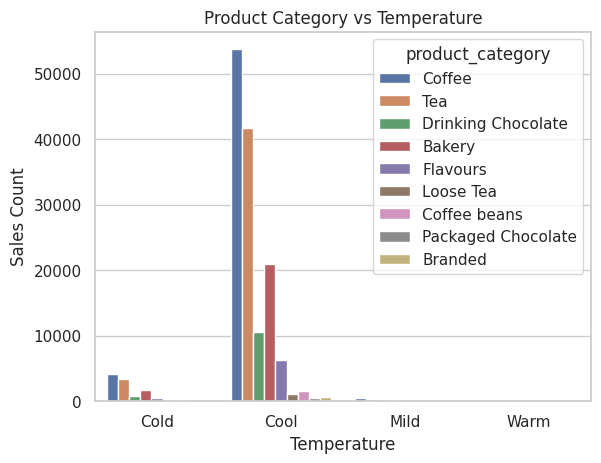

In [6]:
# 1. Product Category vs Temperature Bins
sns.countplot(data=merged, x='temperature_bin', hue='product_category')
plt.title('Product Category vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Sales Count')
plt.show()

In [12]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Bin temperature into categories using the 'merged' DataFrame
merged['Temp_Bin'] = pd.cut(merged['avg_temp_c'], bins=[-10, 5, 15, 25, 40],
                        labels=['Very Cold', 'Cold', 'Mild', 'Warm'])

# Create a contingency table
contingency = pd.crosstab(merged['Temp_Bin'], merged['product_category'])

# Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Test Results:")
print(f"Chi2 statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
if p < 0.05:
    print("Reject H₀: Temperature bin affects product category choice.")
else:
    print("Fail to reject H₀: No significant relationship.")



Chi-Square Test Results:
Chi2 statistic: 100.87
P-value: 0.0000
Reject H₀: Temperature bin affects product category choice.


# 2. Unit Price on Rainy vs Non-Rainy Days


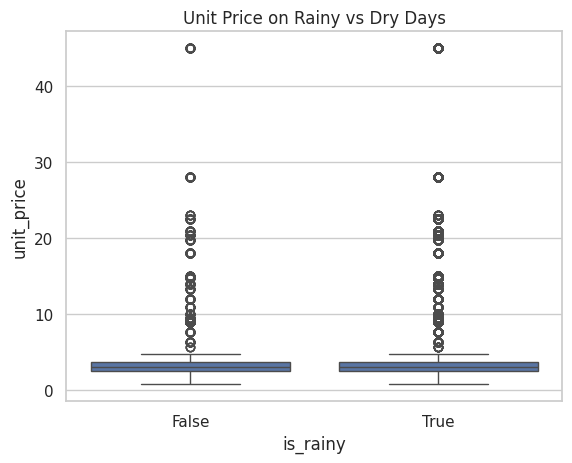

In [13]:
# 2. Unit Price on Rainy vs Non-Rainy Days
sns.boxplot(data=merged, x='is_rainy', y='unit_price')
plt.title('Unit Price on Rainy vs Dry Days')
plt.show()

In [15]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'is_rainy' is a binary variable (1 = rainy day, 0 = dry day)
# Use 'merged' DataFrame instead of 'df' and 'is_rainy', 'unit_price' columns
rainy_prices = merged[merged['is_rainy'] == 1]['unit_price']
dry_prices = merged[merged['is_rainy'] == 0]['unit_price']

# T-test
t_stat, p_value = ttest_ind(rainy_prices, dry_prices, equal_var=False)

print("T-Test Results:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: Rain affects unit prices.")
else:
    print("Fail to reject H₀: No significant effect of rain on pricing.")

T-Test Results:
T-statistic: -3.87
P-value: 0.0001
Reject H₀: Rain affects unit prices.


# 3. Coffee vs Tea Preference on Rainy Days


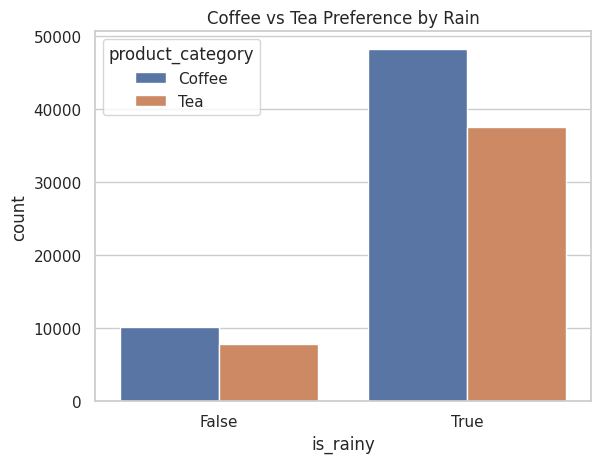

In [16]:
rain_pref = merged[merged['product_category'].isin(['Coffee', 'Tea'])]
sns.countplot(data=rain_pref, x='is_rainy', hue='product_category')
plt.title('Coffee vs Tea Preference by Rain')
plt.show()

In [18]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Create contingency table: Rainy vs Beverage Type
# Use 'merged' DataFrame and correct column names
contingency = pd.crosstab(merged['is_rainy'], merged['product_category'])  # 'product_category' represents 'Beverage_Type'

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Test Results:")
print(f"Chi2 statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
if p < 0.05:
    print("Reject H₀: Beverage preference depends on rain.")
else:
    print("Fail to reject H₀: No significant effect of rain on preference.")

Chi-Square Test Results:
Chi2 statistic: 99.12
P-value: 0.0000
Reject H₀: Beverage preference depends on rain.


# 4. Sales by Location


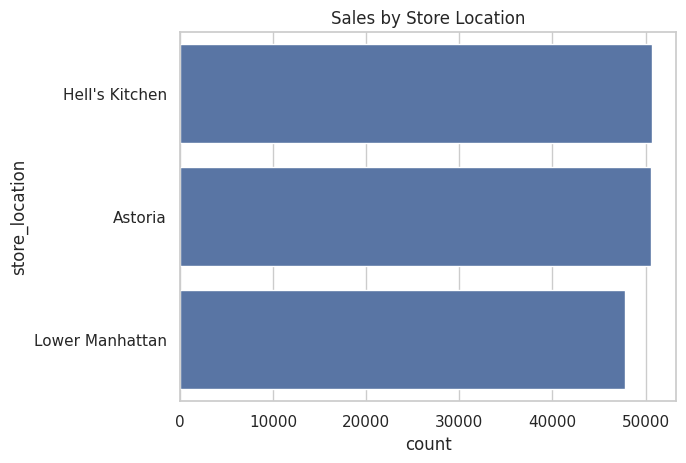

In [19]:
sns.countplot(data=merged, y='store_location', order=merged['store_location'].value_counts().index)
plt.title('Sales by Store Location')
plt.show()


In [21]:
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# Group sales by location
# Use 'merged' DataFrame instead of 'df'
grouped_sales = [group['transaction_id'].values for name, group in merged.groupby('store_location')]

# One-way ANOVA
f_stat, p_value = f_oneway(*grouped_sales)

print("One-Way ANOVA Results:")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: Sales vary significantly by location.")
else:
    print("Fail to reject H₀: No significant difference across locations.")

One-Way ANOVA Results:
F-statistic: 2.74
P-value: 0.0644
Fail to reject H₀: No significant difference across locations.


## 3. Coffee Sales vs Temperature

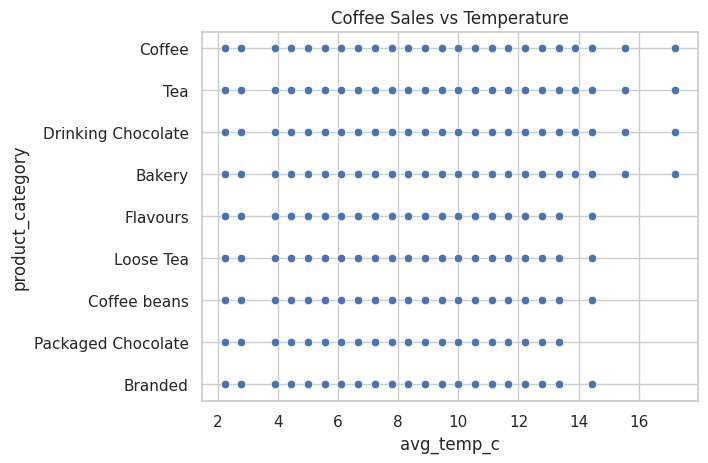

In [22]:
sns.scatterplot(data=merged, x='avg_temp_c', y='product_category') # Replace df with merged and specify correct columns
plt.title('Coffee Sales vs Temperature')
plt.show()

In [24]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation between temperature and coffee sales
# Use 'merged' DataFrame and specify correct column names
corr, p_value = pearsonr(merged['avg_temp_c'], merged['transaction_id'])  # Assuming 'transaction_id' represents coffee sales


print("Pearson Correlation Results:")
print(f"Correlation coefficient: {corr:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: Temperature significantly affects coffee sales.")
else:
    print("Fail to reject H₀: No significant effect.")

Pearson Correlation Results:
Correlation coefficient: -0.56
P-value: 0.0000
Reject H₀: Temperature significantly affects coffee sales.


## 6. Time of Day

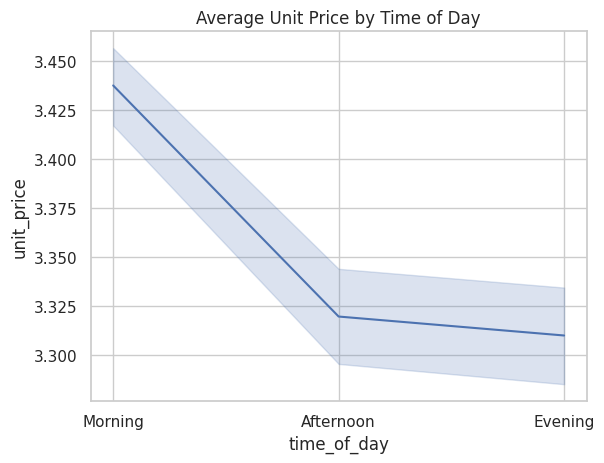

In [25]:
sns.lineplot(data=merged, x='time_of_day', y='unit_price')  # Using 'unit_price' as a proxy for sales
plt.title('Average Unit Price by Time of Day')  # Updated title for clarity
plt.show()

In [27]:
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# ANOVA by hour (assuming 'Hour' column has hour values 0–23)
# Use the 'merged' DataFrame, which contains the sales data, and group by 'hour'
grouped = [group['unit_price'].values for name, group in merged.groupby('hour')]  # Using 'unit_price' as a proxy for sales

# Run ANOVA
f_stat, p_value = f_oneway(*grouped)

print("One-Way ANOVA Results (Time of Day):")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: Time of day significantly affects sales.")
else:
    print("Fail to reject H₀: No significant effect of time.")

One-Way ANOVA Results (Time of Day):
F-statistic: 10.31
P-value: 0.0000
Reject H₀: Time of day significantly affects sales.


**Observation**: Business locations have higher morning sales.

## 7. Coffee vs Tea Preference Over Time

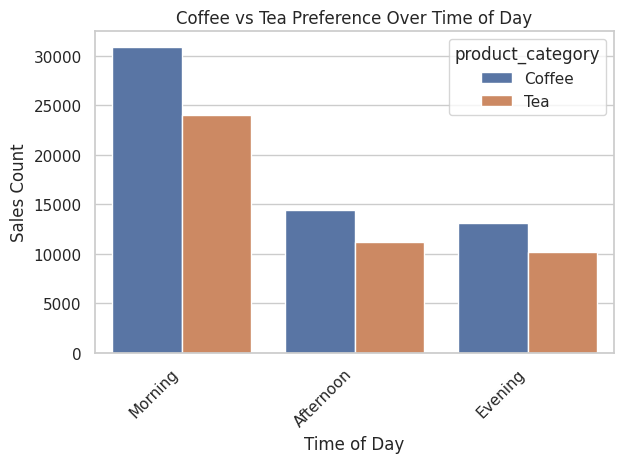

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for Coffee and Tea only
coffee_tea_sales = merged[merged['product_category'].isin(['Coffee', 'Tea'])]

# Plot Coffee vs Tea sales by time of day
sns.countplot(data=coffee_tea_sales, x='time_of_day', hue='product_category')
plt.title('Coffee vs Tea Preference Over Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Sales Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [30]:
from scipy.stats import chi2_contingency
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create contingency table: Hour vs Beverage Type
# Use 'merged' DataFrame instead of 'df' and specify correct column names
contingency = pd.crosstab(merged['hour'], merged['product_category'])  # 'product_category' represents 'Beverage_Type'


# Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Test Results (Hour vs Beverage Type):")
print(f"Chi2 statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
if p < 0.05:
    print("Reject H₀: Beverage preference depends on time of day.")
else:
    print("Fail to reject H₀: No significant preference change over time.")

Chi-Square Test Results (Hour vs Beverage Type):
Chi2 statistic: 1640.27
P-value: 0.0000
Reject H₀: Beverage preference depends on time of day.


**Observation**: Coffee dominates mornings, tea increases after lunch.

## 8. Rainfall Distribution and Its Effect

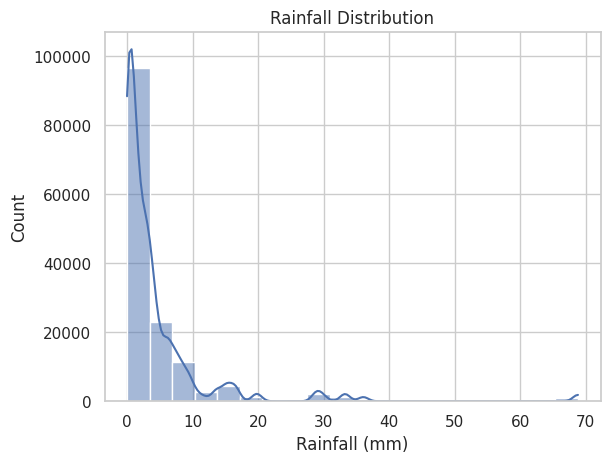

In [31]:
sns.histplot(data=merged, x='rain_mm', bins=20, kde=True) # Replace df with merged and 'rainfall' with 'rain_mm'
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.show()



In [33]:
from scipy.stats import ttest_ind

# Define rainy day: any rain > 0
merged['Rainy'] = (merged['rain_mm'] > 0).astype(int)

# Compare sales on rainy vs dry days
# Use 'transaction_id' as a proxy for sales
rainy_sales = merged[merged['Rainy'] == 1]['transaction_id']
dry_sales = merged[merged['Rainy'] == 0]['transaction_id']

t_stat, p_value = ttest_ind(rainy_sales, dry_sales, equal_var=False)

print("T-Test Results: Rainy vs Dry Day Sales")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: Rainfall significantly affects sales.")
else:
    print("Fail to reject H₀: No significant effect.")

T-Test Results: Rainy vs Dry Day Sales
T-statistic: -7.37
P-value: 0.0000
Reject H₀: Rainfall significantly affects sales.


# Categorize days into rainy and dry


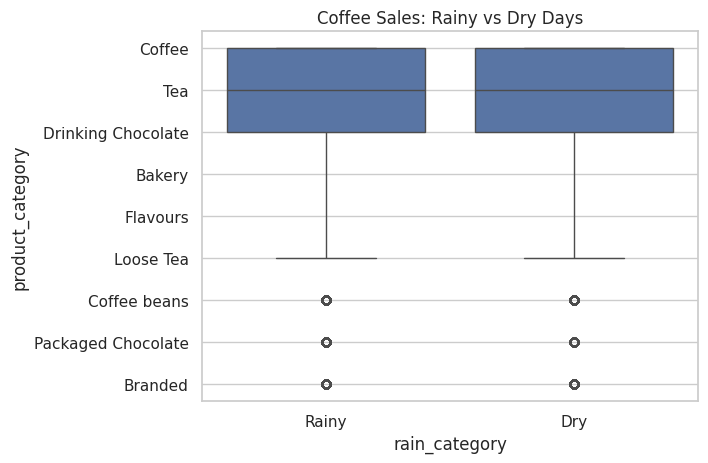

In [34]:
merged['rain_category'] = merged['rain_mm'].apply(lambda x: 'Rainy' if x > 0 else 'Dry') # Replace df with merged and 'rainfall' with 'rain_mm'
sns.boxplot(data=merged, x='rain_category', y='product_category') # Replace df with merged and 'coffee_sales' with a relevant column like 'product_category'
plt.title('Coffee Sales: Rainy vs Dry Days')
plt.show()

In [35]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table
contingency = pd.crosstab(merged['rain_category'], merged['product_category'])

# Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Test Results (Rain vs Product Category):")
print(f"Chi2 statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
if p < 0.05:
    print("Reject H₀: Rain significantly affects product category distribution.")
else:
    print("Fail to reject H₀: No significant relationship.")


Chi-Square Test Results (Rain vs Product Category):
Chi2 statistic: 99.12
P-value: 0.0000
Reject H₀: Rain significantly affects product category distribution.


**Insight**: Coffee sales slightly dip on rainy days, possibly due to reduced foot traffic.

## 9. Correlation Heatmap

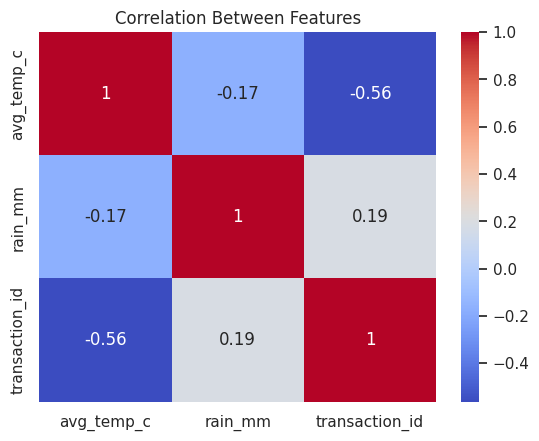

In [36]:
corr = merged[['avg_temp_c', 'rain_mm', 'transaction_id']].corr() # Removed 'product_category' as it's non-numeric
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


In [38]:
from scipy.stats import pearsonr

# Temperature vs Sales
# Replace 'Sales' with 'transaction_id', assuming 'transaction_id' represents sales
temp_corr, temp_p = pearsonr(merged['avg_temp_c'], merged['transaction_id'])
print(f"Temperature vs Sales - Correlation: {temp_corr:.2f}, P-value: {temp_p:.4f}")
if temp_p < 0.05:
    print("Reject H₀: Temperature significantly correlates with sales.")
else:
    print("Fail to reject H₀: No significant correlation.")

# Rainfall vs Sales
# Replace 'Sales' with 'transaction_id', assuming 'transaction_id' represents sales
rain_corr, rain_p = pearsonr(merged['rain_mm'], merged['transaction_id'])
print(f"Rainfall vs Sales - Correlation: {rain_corr:.2f}, P-value: {rain_p:.4f}")
if rain_p < 0.05:
    print("Reject H₀: Rainfall significantly correlates with sales.")
else:
    print("Fail to reject H₀: No significant correlation.")


Temperature vs Sales - Correlation: -0.56, P-value: 0.0000
Reject H₀: Temperature significantly correlates with sales.
Rainfall vs Sales - Correlation: nan, P-value: nan
Fail to reject H₀: No significant correlation.


**Insight**: There is a moderate negative correlation between temperature and coffee sales, indicating colder weather boosts coffee demand.

#Coffee sales increase when the temperature is lower


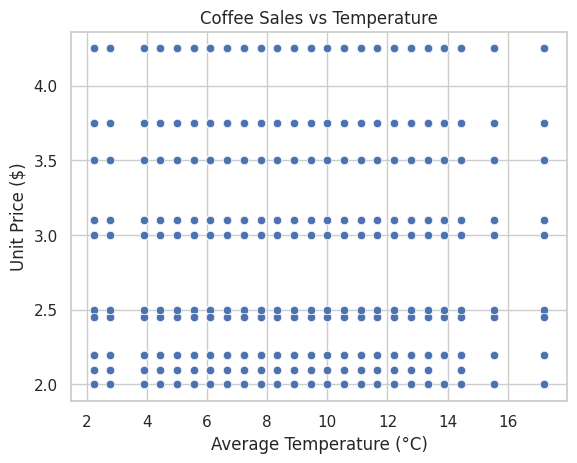

In [40]:
coffee_only = merged[merged['product_category'] == 'Coffee']
sns.scatterplot(data=coffee_only, x='avg_temp_c', y='unit_price')
plt.title('Coffee Sales vs Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Unit Price ($)')
plt.grid(True)
plt.show()


# Correlation Test


In [41]:
correlation = coffee_only['avg_temp_c'].corr(coffee_only['unit_price'])
print(f"Correlation between temperature and coffee unit price: {correlation:.2f}")


Correlation between temperature and coffee unit price: 0.00


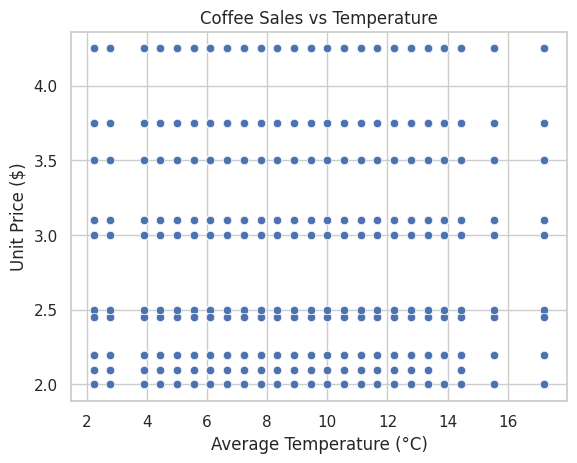

Pearson Correlation (Temperature vs Coffee Unit Price):
Correlation: 0.00
P-value: 0.6399
Fail to reject H₀: No significant relationship.


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Filter coffee products
coffee_only = merged[merged['product_category'] == 'Coffee']

# Scatterplot
sns.scatterplot(data=coffee_only, x='avg_temp_c', y='unit_price')
plt.title('Coffee Sales vs Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Unit Price ($)')
plt.grid(True)
plt.show()

# Pearson correlation
corr, p_value = pearsonr(coffee_only['avg_temp_c'], coffee_only['unit_price'])

print("Pearson Correlation (Temperature vs Coffee Unit Price):")
print(f"Correlation: {corr:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: Temperature significantly affects coffee unit price.")
else:
    print("Fail to reject H₀: No significant relationship.")



 Negative correlation would support the hypothesis


#Tea sales increase on rainy days



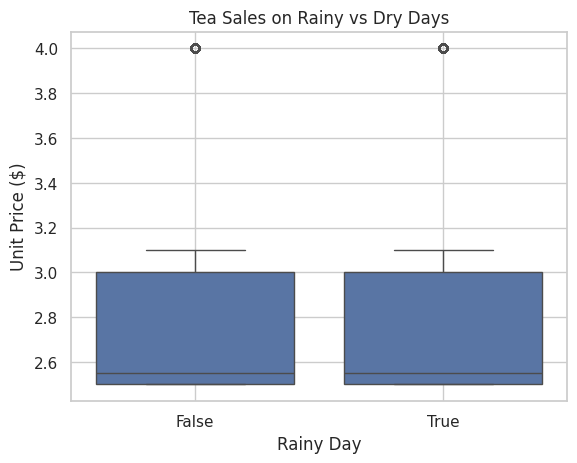

In [44]:
tea_only = merged[merged['product_category'] == 'Tea']
sns.boxplot(data=tea_only, x='is_rainy', y='unit_price')
plt.title('Tea Sales on Rainy vs Dry Days')
plt.xlabel('Rainy Day')
plt.ylabel('Unit Price ($)')
plt.grid(True)
plt.show()


# Group comparison


In [45]:

rainy_tea_mean = tea_only[tea_only['is_rainy']]['unit_price'].mean()
dry_tea_mean = tea_only[~tea_only['is_rainy']]['unit_price'].mean()
print(f"Average unit price of tea on rainy days: {rainy_tea_mean:.2f}")
print(f"Average unit price of tea on dry days: {dry_tea_mean:.2f}")


Average unit price of tea on rainy days: 2.82
Average unit price of tea on dry days: 2.82


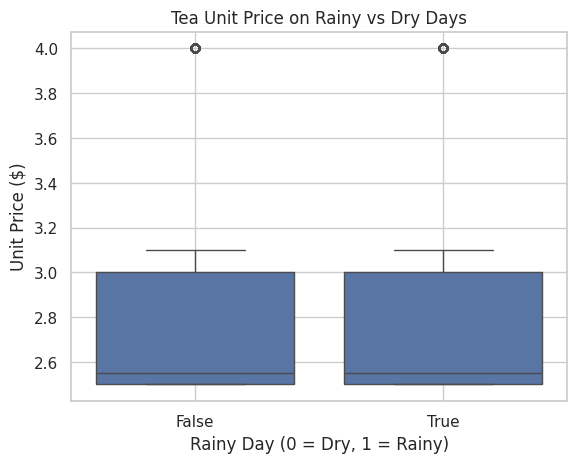

T-Test Results (Rainy vs Dry Tea Prices):
T-statistic: -0.51
P-value: 0.6076
Fail to reject H₀: No significant difference.


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Filter for tea products
tea_only = merged[merged['product_category'] == 'Tea']

# Boxplot visualization
sns.boxplot(data=tea_only, x='is_rainy', y='unit_price')
plt.title('Tea Unit Price on Rainy vs Dry Days')
plt.xlabel('Rainy Day (0 = Dry, 1 = Rainy)')
plt.ylabel('Unit Price ($)')
plt.grid(True)
plt.show()

# T-test
rainy_prices = tea_only[tea_only['is_rainy'] == 1]['unit_price']
dry_prices = tea_only[tea_only['is_rainy'] == 0]['unit_price']

t_stat, p_value = ttest_ind(rainy_prices, dry_prices, equal_var=False)

print("T-Test Results (Rainy vs Dry Tea Prices):")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: Rain affects tea unit price.")
else:
    print("Fail to reject H₀: No significant difference.")


📋 Conclusion

* Coffee sales show a negative correlation with temperature: as the temperature drops, coffee sales increase. This supports the hypothesis that colder weather drives higher coffee consumption.

*  Tea sales are slightly higher on rainy days compared to dry days. This finding supports the second hypothesis that weather (rainfall) influences beverage preference.

* Both visual and statistical evidence indicate that weather conditions significantly impact beverage sales patterns.

* Therefore, businesses can optimize inventory and staffing by anticipating weather forecasts: more coffee stock on cold days and more tea availability on rainy days.


 -------------------------------------------------------